# GOT-10k Python Toolkit

This notebook provides examples on how to use the GOT-10k toolkit.

In [1]:
from __future__ import absolute_import, print_function

ROOT_DIR = '/media/maxi/external/datasets/GOT-10k'
OTB_DIR = '/media/maxi/external/datasets/OTB2015'
VOT_DIR = '/media/maxi/external/datasets/VOT2019'

VOT_DIR_RGBD = '/media/maxi/external/datasets/VOT2019RGBD'
VOT_DIR_RGBT = '/media/maxi/external/datasets/VOT2019RGBT'
VOT_DIR_LT = '/media/maxi/external/datasets/VOT2019LT'

VOT_DIR_LT18 = '/media/maxi/external/datasets/VOT2018LT'

%matplotlib inline

%load_ext autoreload
%autoreload 2

results/GOT-10k
Running tracker IdentityTracker on GOT-10k...
--Sequence 1/180: GOT-10k_Val_000001
 Repetition: 1
  Found results, skipping GOT-10k_Val_000001
--Sequence 2/180: GOT-10k_Val_000002
 Repetition: 1
  Found results, skipping GOT-10k_Val_000002
--Sequence 3/180: GOT-10k_Val_000003
 Repetition: 1
  Found results, skipping GOT-10k_Val_000003
--Sequence 4/180: GOT-10k_Val_000004
 Repetition: 1
  Found results, skipping GOT-10k_Val_000004
--Sequence 5/180: GOT-10k_Val_000005
 Repetition: 1
  Found results, skipping GOT-10k_Val_000005
--Sequence 6/180: GOT-10k_Val_000006
 Repetition: 1
  Found results, skipping GOT-10k_Val_000006
--Sequence 7/180: GOT-10k_Val_000007
 Repetition: 1
  Found results, skipping GOT-10k_Val_000007
--Sequence 8/180: GOT-10k_Val_000008
 Repetition: 1
  Found results, skipping GOT-10k_Val_000008
--Sequence 9/180: GOT-10k_Val_000009
 Repetition: 1
  Found results, skipping GOT-10k_Val_000009
--Sequence 10/180: GOT-10k_Val_000010
 Repetition: 1
  Found resu

--Sequence 85/180: GOT-10k_Val_000085
 Repetition: 1
  Found results, skipping GOT-10k_Val_000085
--Sequence 86/180: GOT-10k_Val_000086
 Repetition: 1
  Found results, skipping GOT-10k_Val_000086
--Sequence 87/180: GOT-10k_Val_000087
 Repetition: 1
  Found results, skipping GOT-10k_Val_000087
--Sequence 88/180: GOT-10k_Val_000088
 Repetition: 1
  Found results, skipping GOT-10k_Val_000088
--Sequence 89/180: GOT-10k_Val_000089
 Repetition: 1
  Found results, skipping GOT-10k_Val_000089
--Sequence 90/180: GOT-10k_Val_000090
 Repetition: 1
  Found results, skipping GOT-10k_Val_000090
--Sequence 91/180: GOT-10k_Val_000091
 Repetition: 1
  Found results, skipping GOT-10k_Val_000091
--Sequence 92/180: GOT-10k_Val_000092
 Repetition: 1
  Found results, skipping GOT-10k_Val_000092
--Sequence 93/180: GOT-10k_Val_000093
 Repetition: 1
  Found results, skipping GOT-10k_Val_000093
--Sequence 94/180: GOT-10k_Val_000094
 Repetition: 1
  Found results, skipping GOT-10k_Val_000094
--Sequence 95/180: G

--Sequence 168/180: GOT-10k_Val_000168
 Repetition: 1
  Found results, skipping GOT-10k_Val_000168
--Sequence 169/180: GOT-10k_Val_000169
 Repetition: 1
  Found results, skipping GOT-10k_Val_000169
--Sequence 170/180: GOT-10k_Val_000170
 Repetition: 1
  Found results, skipping GOT-10k_Val_000170
--Sequence 171/180: GOT-10k_Val_000171
 Repetition: 1
  Found results, skipping GOT-10k_Val_000171
--Sequence 172/180: GOT-10k_Val_000172
 Repetition: 1
  Found results, skipping GOT-10k_Val_000172
--Sequence 173/180: GOT-10k_Val_000173
 Repetition: 1
  Found results, skipping GOT-10k_Val_000173
--Sequence 174/180: GOT-10k_Val_000174
 Repetition: 1
  Found results, skipping GOT-10k_Val_000174
--Sequence 175/180: GOT-10k_Val_000175
 Repetition: 1
  Found results, skipping GOT-10k_Val_000175
--Sequence 176/180: GOT-10k_Val_000176
 Repetition: 1
  Found results, skipping GOT-10k_Val_000176
--Sequence 177/180: GOT-10k_Val_000177
 Repetition: 1
  Found results, skipping GOT-10k_Val_000177
--Sequence

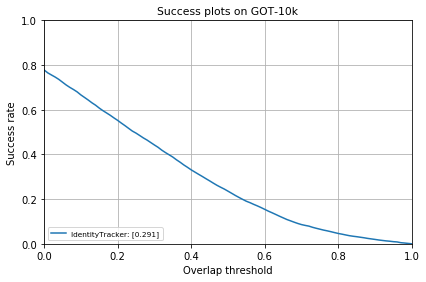

In [2]:
# 1. Quick Start: A Concise Example
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from got10k.trackers import Tracker
from got10k.experiments import ExperimentGOT10k

class IdentityTracker(Tracker):
    """Example on how to define a tracker.

        To define a tracker, simply override ``init`` and ``update`` methods
            from ``Tracker`` with your own pipelines.
    """
    def __init__(self):
        super(IdentityTracker, self).__init__(
            name='IdentityTracker', # name of the tracker
            is_deterministic=True   # deterministic (True) or stochastic (False)
        )
    
    def init(self, image, box):
        """Initialize your tracking model in the first frame
        
        Arguments:
            image {PIL.Image} -- Image in the first frame.
            box {np.ndarray} -- Target bounding box (4x1,
                [left, top, width, height]) in the first frame.
        """
        self.box = box

    def update(self, image):
        """Locate target in an new frame and return the estimated bounding box.
        
        Arguments:
            image {PIL.Image} -- Image in a new frame.
        
        Returns:
            np.ndarray -- Estimated target bounding box (4x1,
                [left, top, width, height]) in ``image``.
        """
        return self.box

if __name__ == '__main__':
    # setup tracker
    tracker = IdentityTracker()

    # setup experiment (validation subset)
    experiment = ExperimentGOT10k(
        root_dir=ROOT_DIR,          # GOT-10k's root directory
        subset='val',               # 'train' | 'val' | 'test'
        result_dir='results',       # where to store tracking results
        report_dir='reports'        # where to store evaluation reports
    )

    # run experiments on GOT-10k
    experiment.run(tracker, visualize=False)

    # report performance on GOT-10k (validation subset)
    experiment.report([tracker.name])

Sequence: GOT-10k_Val_000001
Sequence length: 60
Sequence: GOT-10k_Val_000002
Sequence length: 100
Sequence: GOT-10k_Val_000003
Sequence length: 80
Sequence: GOT-10k_Val_000004
Sequence length: 91
Sequence: GOT-10k_Val_000005
Sequence length: 80
Sequence: GOT-10k_Val_000006
Sequence length: 80
Sequence: GOT-10k_Val_000007
Sequence length: 100
Sequence: GOT-10k_Val_000008
Sequence length: 90
Sequence: GOT-10k_Val_000009
Sequence length: 100
Sequence: GOT-10k_Val_000010
Sequence length: 99
Sequence: GOT-10k_Val_000011
Sequence length: 100
Sequence: GOT-10k_Val_000012
Sequence length: 70
Sequence: GOT-10k_Val_000013
Sequence length: 100
Sequence: GOT-10k_Val_000014
Sequence length: 100
Sequence: GOT-10k_Val_000015
Sequence length: 120
Sequence: GOT-10k_Val_000016
Sequence length: 100
Sequence: GOT-10k_Val_000017
Sequence length: 100
Sequence: GOT-10k_Val_000018
Sequence length: 100
Sequence: GOT-10k_Val_000019
Sequence length: 100
Sequence: GOT-10k_Val_000020
Sequence length: 98
Sequence:

Sequence: GOT-10k_Val_000180
Sequence length: 108


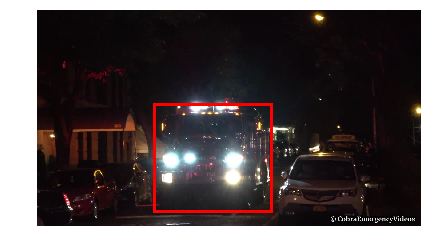

<Figure size 432x288 with 0 Axes>

In [3]:
# 2. Loop Over GOT-10k

from PIL import Image
from got10k.datasets import GOT10k
from got10k.utils.viz import show_frame

# setup dataset
dataset = GOT10k(ROOT_DIR, subset='val')

# index dataset
img_files, anno = dataset[10]

# loop over the complete dataset
for s, (img_files, anno) in enumerate(dataset):
    seq_name = dataset.seq_names[s]
    print('Sequence:', seq_name)
    
    assert len(img_files) == len(anno)
    print('Sequence length:', len(img_files))
    
# visualize an example
image = Image.open(img_files[10])
show_frame(image, anno[10, :])

In [4]:
# 3. Evaluate on Test Set of GOT-10k

tracker = IdentityTracker()

experiment = ExperimentGOT10k(
    root_dir=ROOT_DIR,
    subset='test')
experiment.run(tracker)

# a ".zip" file will be generated ready for submission
# follow the guide to submit your results to
# http://got-10k.aitestunion.com/
experiment.report([tracker.name])

results/GOT-10k
[WARNING]:
The groundtruths of GOT-10k's test set is withholded.
You will have to submit your results to
[http://got-10k.aitestunion.com/]
to access the performance.
Running tracker IdentityTracker on GOT-10k...
--Sequence 1/180: GOT-10k_Test_000001
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000001/GOT-10k_Test_000001_001.txt
--Sequence 2/180: GOT-10k_Test_000002
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000002/GOT-10k_Test_000002_001.txt
--Sequence 3/180: GOT-10k_Test_000003
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000003/GOT-10k_Test_000003_001.txt
--Sequence 4/180: GOT-10k_Test_000004
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000004/GOT-10k_Test_000004_001.txt
--Sequence 5/180: GOT-10k_Test_000005
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000005/GOT-10k_Test_000005_001.t

  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000052/GOT-10k_Test_000052_001.txt
--Sequence 53/180: GOT-10k_Test_000053
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000053/GOT-10k_Test_000053_001.txt
--Sequence 54/180: GOT-10k_Test_000054
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000054/GOT-10k_Test_000054_001.txt
--Sequence 55/180: GOT-10k_Test_000055
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000055/GOT-10k_Test_000055_001.txt
--Sequence 56/180: GOT-10k_Test_000056
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000056/GOT-10k_Test_000056_001.txt
--Sequence 57/180: GOT-10k_Test_000057
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000057/GOT-10k_Test_000057_001.txt
--Sequence 58/180: GOT-10k_Test_000058
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Te

  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000105/GOT-10k_Test_000105_001.txt
--Sequence 106/180: GOT-10k_Test_000106
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000106/GOT-10k_Test_000106_001.txt
--Sequence 107/180: GOT-10k_Test_000107
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000107/GOT-10k_Test_000107_001.txt
--Sequence 108/180: GOT-10k_Test_000108
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000108/GOT-10k_Test_000108_001.txt
--Sequence 109/180: GOT-10k_Test_000109
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000109/GOT-10k_Test_000109_001.txt
--Sequence 110/180: GOT-10k_Test_000110
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000110/GOT-10k_Test_000110_001.txt
--Sequence 111/180: GOT-10k_Test_000111
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-

  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000160/GOT-10k_Test_000160_001.txt
--Sequence 161/180: GOT-10k_Test_000161
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000161/GOT-10k_Test_000161_001.txt
--Sequence 162/180: GOT-10k_Test_000162
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000162/GOT-10k_Test_000162_001.txt
--Sequence 163/180: GOT-10k_Test_000163
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000163/GOT-10k_Test_000163_001.txt
--Sequence 164/180: GOT-10k_Test_000164
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000164/GOT-10k_Test_000164_001.txt
--Sequence 165/180: GOT-10k_Test_000165
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000165/GOT-10k_Test_000165_001.txt
--Sequence 166/180: GOT-10k_Test_000166
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-

In [6]:
# 4. Run Experiments on OTB and VOT

from got10k.experiments import ExperimentOTB, ExperimentVOT

tracker = IdentityTracker()

# run and evaluate on OTB
#experiment = ExperimentOTB(root_dir=OTB_DIR, version=2015)
#experiment.run(tracker, visualize=False)
#experiment.report([tracker.name])

# run and evaluate on VOT2018
experiment = ExperimentVOT(root_dir=VOT_DIR_RGBD, version='RGBD2019')
#experiment = ExperimentVOT(root_dir=VOT_DIR_RGBT, version='RGBT2019')
#experiment = ExperimentVOT(root_dir=VOT_DIR_LT, version='LT2019')
#experiment = ExperimentVOT(root_dir=VOT_DIR_LT18, version='LT2018')
#experiment.run(tracker, visualize=False)
#experiment.report([tracker.name])

Version RGBD2019
Year 2019
homepage http://data.votchallenge.net/vot2019/rgbd/

Parsing description file...
backpack_blue is already downloaded and extracted
backpack_robotarm_lab_occ is already downloaded and extracted
backpack_room_noocc_1 is already downloaded and extracted
bag_outside is already downloaded and extracted
bicycle2_outside is already downloaded and extracted
bicycle_outside is already downloaded and extracted
bottle_box is already downloaded and extracted
bottle_room_noocc_1 is already downloaded and extracted
bottle_room_occ_1 is already downloaded and extracted
box1_outside is already downloaded and extracted
box_darkroom_noocc_1 is already downloaded and extracted
box_darkroom_noocc_10 is already downloaded and extracted
box_darkroom_noocc_2 is already downloaded and extracted
box_darkroom_noocc_3 is already downloaded and extracted
box_darkroom_noocc_4 is already downloaded and extracted
box_darkroom_noocc_5 is already downloaded and extracted
box_darkroom_noocc_6

In [5]:
# 5. Loop Over OTB and VOT Datasets

from got10k.datasets import OTB, VOT

def loop_dataset(dataset):
    for s, (img_files, anno) in enumerate(dataset):
        seq_name = dataset.seq_names[s]
        print('Sequence:', seq_name)
        
        assert(len(img_files) == len(anno))
        print('Sequence length:', len(img_files))

# loop over OTB
dataset = OTB(root_dir=OTB_DIR, version=2015)
loop_dataset(dataset)

# loop over VOT
dataset = VOT(root_dir=VOT_DIR, version=2018)
loop_dataset(dataset)

Files already downloaded.
Sequence: Basketball
Sequence length: 725
Sequence: Biker
Sequence length: 142
Sequence: Bird1
Sequence length: 408
Sequence: Bird2
Sequence length: 99
Sequence: BlurBody
Sequence length: 334
Sequence: BlurCar1
Sequence length: 742
Sequence: BlurCar2
Sequence length: 585
Sequence: BlurCar3
Sequence length: 357
Sequence: BlurCar4
Sequence length: 380
Sequence: BlurFace
Sequence length: 493
Sequence: BlurOwl
Sequence length: 631
Sequence: Board
Sequence length: 698
Sequence: Bolt
Sequence length: 350
Sequence: Bolt2
Sequence length: 293
Sequence: Box
Sequence length: 1161
Sequence: Boy
Sequence length: 602
Sequence: Car1
Sequence length: 1020
Sequence: Car2
Sequence length: 913
Sequence: Car24
Sequence length: 3059
Sequence: Car4
Sequence length: 659
Sequence: CarDark
Sequence length: 393
Sequence: CarScale
Sequence length: 252
Sequence: ClifBar
Sequence length: 472
Sequence: Coke
Sequence length: 291
Sequence: Couple
Sequence length: 140
Sequence: Coupon
Sequen